

<h1 style="text-align: left; color:Indian_red; padding: 10px; border: 5px solid Indian_red;"> 
    T.P. n°3
    <span style="float:right;"> Retour sur les graphes - corrigé  </span>
</h1>


## Première partie : coloriage de graphe

### Définitions


Soit $G=(V, E)$ un graphe non-orienté, où $V$ est un ensemble de sommets et $E$ un ensemble d'arêtes. Soit $k \in \mathbb{N}^{*}$. 
Un $\boldsymbol{k}$-coloriage de $G$ est une fonction $c: V \to\{0, \ldots, k-1\}$ telle que :

$$
\{u, v\} \in E \Longrightarrow c(u) \neq c(v)
$$

Dit autrement, un $k$-coloriage donne une couleur (qu'on suppose être un entier entre 0 et $k-1$, pour simplifier) à chaque sommet, tel que deux sommets adjacents soient de couleurs différentes.

Suivant les questions, on utilisera soit une matrice d'adjacence, soit une liste d'adjacence, il faudra être bien attentifs.
Soit $G_{1}$ le graphe suivant :


<div align="center">
<img width="460" height="300" src="./Images/graphe1.png">
</div>

>**Question**   
Écrire une ou plusieurs instruction(s) Python pour définir $G_{1}$ par liste d'adjacence.

In [4]:
## Définition de G1
G1 = [[1, 3], [0, 2, 4, 5], [1, 5], [0, 4], [3, 1, 5], [4, 1, 2]]

>**Question**   
Donner une 3-coloration pour $G_{1}$. On pourra recopier $G_{1}$ en mettant, à côté de chaque sommet, une couleur (c'est-à-dire $0,1$ ou 2$)$

>**Réponse**   
Exemple de 3-coloriage possible :

| Sommet | 0 | 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---|---|---|
| Couleur | 0 | 1 | 0 | 1 | 0 | 2 |


>**Question**   
Justifier que $G_{1}$ ne possède pas de 2-coloration.

>**Réponse**   
Les 3 sommets 1, 2, 5 sont tous reliés entre eux donc doivent être de couleurs différentes. D'où la nécessité d'avoir au moins 3 couleurs.

>**Question**   
Si $n$ est le nombre de sommets d'un graphe $G$, montrer que $G$ possède une $n$-coloration.

>**Réponse**   
 Il suffit de colorier chaque sommet avec une couleur différente.

Dans toute la suite, on représente une $k$-coloration par une liste `C` telle que `C[i]` est la couleur (entre 0 et $k-1$ ) du sommet $i$.

>**Question**    
Écrire une fonction `est_valide(G,C)` déterminant si la coloration `C` est valide sur le graphe représenté par la liste d'adjacence `G`.
Par exemple, si `G1` est la liste d'adjacence de $G_{1}$, `est_valide(G1,[0,0,1,2,3,4])` doit renvoyer `False` (car les sommets 0 et 1 sont adjacents et sont tous les deux coloriés avec la couleur 0 mais `est_valide(G1,[3,0,1,0,3,4])` doit renvoyer `True` (toutes les arêtes ont bien des extremités de couleurs différentes).

In [6]:
def est_valide(G, C):
    for u,Gu in enumerate(G):
        for v in Gu:
            if C[u] == C[v]:
                return False
    return True

not est_valide(G1, [0, 0, 1, 2, 3, 4]) and est_valide(G1, [3, 0, 1, 0, 3, 4])

True

### Degré

>**Question**   
Écrire une fonction `deg(G,v)` renvoyant le degré d'un sommet $v$ dans le graphe $G$ représenté par liste d'adjacence.

In [13]:
def deg(G, v):
    return len(G[v])

>**Question**   
Écrire une fonction `deg_max(G)` calculant le degré maximum d'un sommet dans le graphe $G$ représenté par liste d'adjacence. On appelle $\Delta(G)$ ce nombre.

In [10]:
def deg_max(G):
    maxi = 0
    for v in range(len(G)):
        d = deg(G, v)
        if d > maxi:
            maxi = d
    return maxi

deg_max(G1)

4

Il existe un algorithme simple donnant une $(\Delta(G)+1)$-coloration pour un graphe $G$ : considérer chaque sommet $v$ un par un (de 0 à $n-1$, où $n$ est le nombre de sommets) et lui donner la plus petite couleur n'apparaissant pas parmi les voisins de $v$.

>**Question**   
Écrire une fonction `couleur_delta(G)` renvoyant une $(\Delta(G)+1)$-coloration de $G$ représenté par liste d'adjacence. Le résultat sera donc une liste `C` telle que `C[v]` est la couleur donnée à `v`.

In [12]:
def couleur_delta(G):
    n = len(G)
    # les couleurs de chaque sommet
    colors = [-1]*n 
    for u in range(n):
        colors_u = [False]*n 
        # colors_u[c] est True ssi la couleur c est utilisée 
        # parmi les voisins de u
        for v in G[u]:
            if colors[v] != -1:
                colors_u[colors[v]] = True
        i=0
        while i<n and colors_u[i]:
            i+=1
        colors[u] = i
    return colors

couleur_delta(G1)

[0, 1, 0, 1, 0, 2]

### Clique

Une clique d'un graphe $G$ est un sous-graphe complet, c'est-à-dire un ensemble de sommets contenant toutes les arêtes possibles entre deux sommets. La taille d'une clique est son nombre de sommets.

Par exemple, l'ensemble de sommets $\{1,2,5\}$ forme une clique de taille 3 de $G_{1}$, puisque ces 3 sommets sont tous reliés par des arêtes. 1. Soit $k \in \mathbb{N}^{*}$. 

>**Question**   
Montrer que s'il existe une clique de taille $k$ dans $G$, alors $G$ n'est pas $(k-1)$-coloriable.

>**Réponse**   
Tous les sommets d'une clique doivent être de couleur différente.

>**Question**   
Écrire une fonction `liste_vers_matrice(G)` qui renvoie la matrice d'adjacence (codée sous forme de liste de listes>) associée au graphe représenté par sa liste d'adjacence `G`.

In [17]:
def liste_vers_matrice(G):
    N=len(G)
    M=[[0]*N for _ in range(N)]
    for i,l in enumerate(G):
        for j in l:
            M[i][j]=1
    return M

liste_vers_matrice(G1)

[[0, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 0],
 [0, 1, 0, 1, 0, 1],
 [0, 1, 1, 0, 1, 0]]

>**Question**   
Écrire une fonction `est_clique(G,V)` déterminant si la liste des sommets `V` forme une clique dans la matrice d'adjacence `G`.   
On indique que `[1,2,5]` est une clique de $G_1$ mais que `[1,2,3]` n'en est pas une.

In [21]:
def est_clique(G, V):
    for u in V:
        for v in V:
            if u != v and G[u][v] == 0:
                return False
    return True

est_clique(liste_vers_matrice(G1),[1,2,5]) and not est_clique(liste_vers_matrice(G1),[1,2,3])

True

### Comptage du nombre de couleurs

Étant donnée une liste d'entiers (des couleurs), non forcément consécutifs, on veut savoir quel est le nombre d'entiers différents (le nombre de couleurs). Par exemple, le nombre de valeurs différentes de `[1,4,0,4,1]` est 3 (il y a 3 entiers différents : $0,1,4$). Pour cela, on étudie trois méthodes différentes (et indépendantes).

>**Question**   
Écrire une fonction ```n_couleur1(C)``` renvoyant le nombre d'entiers différents dans une liste C, en utilisant 2 boucles inconditionnelles.


In [23]:
def ncouleur1(C):
    L = []
    for c in C:
        if c not in L:
            L.append(c)
    return len(L)

ncouleur1([1, 4, 0, 4, 1])

3

>**Question**   
Quelle est la complexité de ncolor1(C), en fonction de la taille $n$ de $C$ ?
 

>**Réponse**   
Complexité : $\mathcal{O}(n^2)$ car chaque le test `in` de la ligne 4 est de coût linéaire.

Si ```L``` est une liste, `L.sort()` permet de trier les éléments de L (par ordre croissant) en modifiant la liste mais sans renvoyer de valeur. On admet que `L.sort()` est de complexité $\mathrm{O}(n \log (n))$, où $n$ est le nombre d'éléments de L.

>**Question**   
Écrire une fonction `n_couleur2(C)` renvoyant le nombre d'entiers différents dans une liste `C`, en triant `C`. Cette fonction doit être de complexité $\mathcal{O}(n \log (n))$ où $n$ est la taille de `C`, et on demande de justifier cette complexité.

In [26]:
def ncouleur2(C):
    C.sort()
    n = 1
    for i in range(len(C) - 1):
        if C[i] != C[i + 1]:
            n += 1
    return n

ncouleur2([1, 4, 0, 4, 1])

3

Une 3ème méthode consiste à utiliser une liste `B` de booléens de taille $p$, où $p$ est le maximum de `C`, telle que `B[i]` vaut `True` si et seulement si i est dans `C`.

>**Question**   
Écrire une fonction `n_couleur3(C)` renvoyant le nombre d'entiers différents dans une liste `C`, en créant et utilisant une telle liste `B`. Cette fonction doit être de complexité $\mathcal{O}(n+p)$ et on justifiera cette complexité.

>**Réponse**   


In [28]:
def ncouleur3(C):
    B = [False]*len(C)
    for c in C:
        B[c] = True
    n = 0
    for i in range(len(B)):
        if B[i]:
            n += 1
    return n

ncouleur3([1, 4, 0, 4, 1])

3

### 2-coloration par parcours en profondeur

On veut écrire un algorithme pour obtenir une 2-coloration d'un graphe connexe $G$. Pour cela, on exécute un parcours en profondeur depuis un sommet $v$ quelconque (par exemple le sommet 0 ) de $G$, que l'on colorie avec la couleur 0 , puis on colorie les voisins de $v$ avec la couleur 1 , puis les voisins des voisins avec la couleur $0 \ldots$

On pourra utiliser le fait que si $c \in\{0,1\}$ est une couleur, alors $1-c$ est l'autre couleur $(1-c=1$ si $c=0$ et $1-c=0$ si $c=1)$. Si, à un moment de l'algorithme, on doit colorier un sommet avec une couleur alors qu'il a déjà été colorié d'une couleur différente, $G$ n'est pas 2-coloriable.



>**Question**   
Proposer une fonction ```couleur2(G)``` pour renvoyer un 2-coloriage dans le graphe $G$ représenté par liste d'adjacence. Si $G$ n'a pas de 2-coloriage, on renverra `False`.

In [30]:
def couleur2(G):
    C = [-1]*len(G)
    def aux(v, c): # parcours en profondeur sur v, en lui donnant la couleur c
        if C[v] == 1 - c:
            return False
        if C[v] == c:
            return True
        C[v] = c
        for w in G[v]:
            if not aux(w, 1 - c):
                return False
        return True
    if not aux(0, 0):
        return False
    return C

# une alternative plus proche du cours qui utilise les listes de priorité
from collections import deque

def couleur2B(G):
    n=len(G)
    M=liste_vers_matrice(G)
    print(M)
    pile_sommets_en_attente=deque([0])
    liste_sommets_vus={i:0 for i in range(n)}
    couleur_sommets=dict()
    couleur_sommets[0]=0
    while len(pile_sommets_en_attente)>0:
        s=pile_sommets_en_attente.popleft()
        if liste_sommets_vus[s]==0:
            liste_sommets_vus[s]=1
        j=0
        while j<n:
            if M[s][j]:
                if j!=s and j in couleur_sommets and couleur_sommets[j]==couleur_sommets[s]:
                    return False
                if liste_sommets_vus[j]==0:
                    pile_sommets_en_attente.appendleft(j)
                    couleur_sommets[j]=1-couleur_sommets[s]
            j+=1
    return couleur_sommets


G2=[[1,4],[0,2],[1,3],[2],[0]]
couleur2(G1),couleur2(G2),couleur2B(G1),couleur2B(G2)

[[0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 0]]
[[0, 1, 0, 0, 1], [1, 0, 1, 0, 0], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 0]]


(False, [0, 1, 0, 1, 1], False, {0: 0, 1: 1, 4: 1, 2: 0, 3: 1})

## Deuxième partie : Recherche du plus court chemin sur un graphe de Open_street_map

Open_street_map est un projet collaboratif de cartographie en ligne qui vise à constituer une base de données géographiques libre du monde. Nous allons y accéder via Python avec le module `osmnx` :

In [32]:
try:
    __import__("osmnx")
except Import_error:
    ! pip install osmnx
import osmnx as ox
import urllib
from IPython import display

[Vous pouvez voir d'autres exemples d'utilisation de Open_street_map ici.](https://github.com/gboeing/osmnx-examples/tree/main/notebooks)  

Par exemple, voici le graphe du réseau routier à proximité de Ginette.

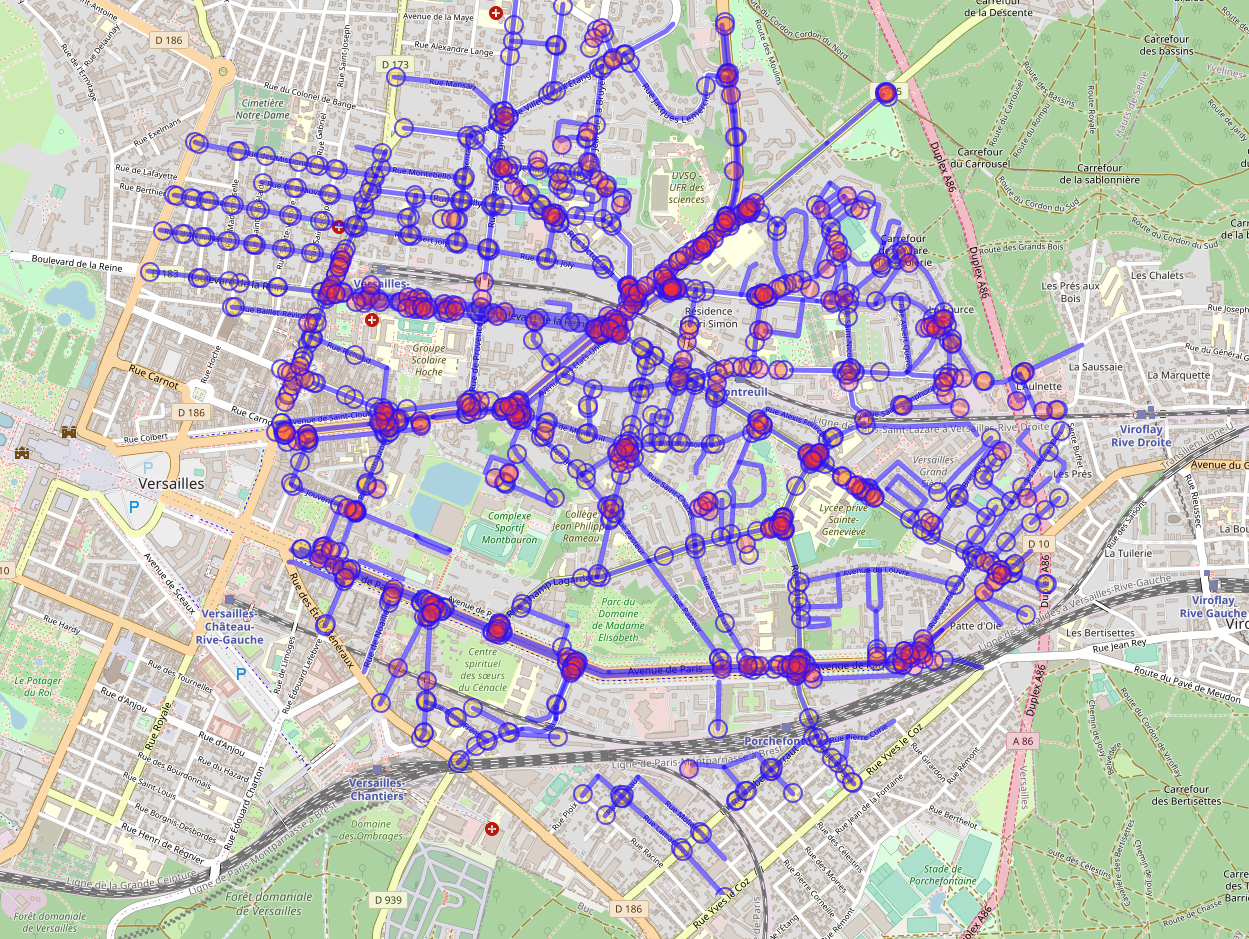

In [34]:
display.Image("./Images/carte_bJ.png")

Les informations contenues dans cette carte peuvent être interprétées en termes de graphes à l'aide du module importé.

On donne ci-dessous le code à utiliser pour télécharger les informations quand on a accès à internet ...



In [ ]:
'''
G= ox.graph_from_point((48.803887, 2.155151), dist=2000, network_type='drive')
ox.plot_graph(G)
ox.save_graphml(G, filepath="./ginette.osm")
'''

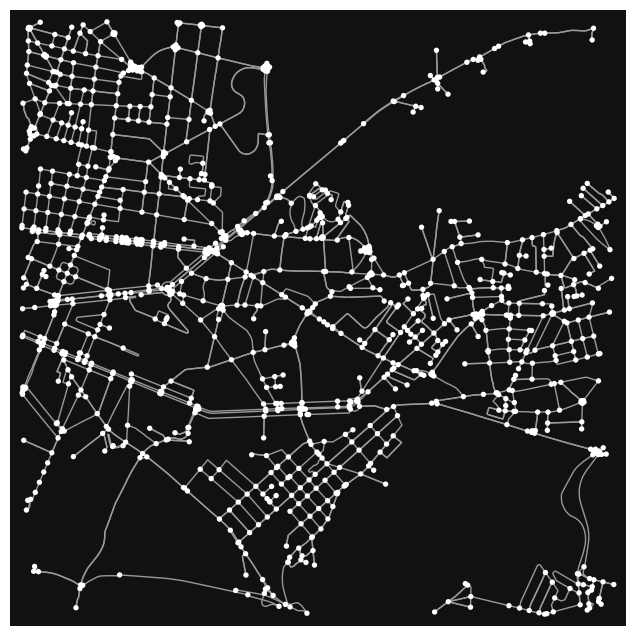

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [50]:
G = ox.load_graphml("./Images/ginette.osm")
ox.plot_graph(G)

On peut récupérer les sommets (intersections) et les arêtes (routes, places...) du graphe :

In [36]:
nodes, edges = ox.graph_to_gdfs(G)

In [37]:
nodes # sommets

y         x          highway  street_count  ref  \
osmid                                                                 
35157845    48.795655  2.138980  traffic_signals             4  NaN   
35157898    48.788005  2.150045              NaN             3  NaN   
35157900    48.789574  2.148480              NaN             3  NaN   
35157905    48.791679  2.146063              NaN             3  NaN   
35157914    48.787163  2.150208              NaN             3  NaN   
...               ...       ...              ...           ...  ...   
9833863129  48.805008  2.132047              NaN             3  NaN   
9833863130  48.804909  2.130707              NaN             3  NaN   
9833863132  48.804698  2.131013              NaN             3  NaN   
9833863133  48.804262  2.130866              NaN             2  NaN   
9918570037  48.787365  2.180368              NaN             2  NaN   

                            geometry  
osmid                                 
35157845    POINT (2.13898 48.79565)  
35157898    POINT (2.15005 48.78801)  
35157900    POINT (2.14848 48.78957)  
35157905    POINT (2.14606 48.79168)  
35157914    POINT (2.15021 48.78716)  
...                              ...  
9833863129  POINT (2.13205 48.80501)  
9833863130  POINT (2.13071 48.80491)  
9833863132  POINT (2.13101 48.80470)  
9833863133  POINT (2.13087 48.80426)  
9918570037  POINT (2.18037 48.78736)  

[1183 rows x 6 columns]

Chaque sommet possède un identifiant `osmid`.

In [38]:
edges # arêtes

osmid lanes    ref  \
u          v          key                                       
35157845   360599775  0                 19784314     3  D 939   
           206130429  0                 32124015   NaN    NaN   
           360599779  0                 32124016     3  D 186   
           161395188  0    [727098492, 90183287]     2  D 186   
35157898   258313728  0                  5170252   NaN  D 186   
...                                          ...   ...    ...   
9833863132 81080050   0               1071665288     2    NaN   
9833863133 1204778417 0                 19786006     4    NaN   
           907016980  0               1071665290     2    NaN   
9918570037 201410510  0               1082252974   NaN    NaN   
           201409855  0               1082252973   NaN    NaN   

                                             name      highway maxspeed  \
u          v          key                                                 
35157845   360599775  0    Rue de la Porte de Buc    secondary       50   
           206130429  0           Rue Jean Mermoz     tertiary       30   
           360599779  0         Rue des Chantiers      primary       50   
           161395188  0         Rue des Chantiers      primary       50   
35157898   258313728  0                       NaN      primary       50   
...                                           ...          ...      ...   
9833863132 81080050   0        Avenue de l'Europe      primary       50   
9833863133 1204778417 0        Avenue de l'Europe      primary       50   
           907016980  0        Avenue de l'Europe      primary       50   
9918570037 201410510  0     Rue Nungesser et Coli  residential      NaN   
           201409855  0     Rue Nungesser et Coli  residential      NaN   

                           oneway reversed   length  \
u          v          key                             
35157845   360599775  0     False    False   32.738   
           206130429  0     False     True  115.826   
           360599779  0     False    False   36.016   
           161395188  0     False     True  137.986   
35157898   258313728  0      True    False   68.161   
...                           ...      ...      ...   
9833863132 81080050   0      True    False   25.689   
9833863133 1204778417 0     False    False   45.746   
           907016980  0      True    False   22.174   
9918570037 201410510  0     False     True   23.446   
           201409855  0      True    False   46.041   

                                                                    geometry  \
u          v          key                                                      
35157845   360599775  0    LINESTRING (2.13898 48.79565, 2.13886 48.79553...   
           206130429  0    LINESTRING (2.13898 48.79565, 2.13906 48.79572...   
           360599779  0    LINESTRING (2.13898 48.79565, 2.13917 48.79556...   
           161395188  0    LINESTRING (2.13898 48.79565, 2.13889 48.79570...   
35157898   258313728  0    LINESTRING (2.15005 48.78801, 2.15015 48.78784...   
...                                                                      ...   
9833863132 81080050   0    LINESTRING (2.13101 48.80470, 2.13110 48.80477...   
9833863133 1204778417 0      LINESTRING (2.13087 48.80426, 2.13101 48.80466)   
           907016980  0    LINESTRING (2.13087 48.80426, 2.13079 48.80416...   
9918570037 201410510  0      LINESTRING (2.18037 48.78736, 2.18044 48.78757)   
           201409855  0    LINESTRING (2.18037 48.78736, 2.18010 48.78740...   

                          tunnel junction access width bridge  
u          v          key                                      
35157845   360599775  0      NaN      NaN    NaN   NaN    NaN  
           206130429  0      NaN      NaN    NaN   NaN    NaN  
           360599779  0      NaN      NaN    NaN   NaN    NaN  
           161395188  0      NaN      NaN    NaN   NaN    NaN  
35157898   258313728  0      NaN      NaN    NaN   NaN    NaN  
...             

On voit par exemple que les rues sont divisées en sections de longueur variable, et que chaque section est reliée à au moins un sommet.

On peut alors obtenir les informations à l'aide des identifiants


In [39]:
nodes.query("osmid == 1490539267") # sommet de Ginette

y         x   highway  street_count  ref  \
osmid                                                          
1490539267  48.803652  2.155687  crossing             3  NaN   

                            geometry  
osmid                                 
1490539267  POINT (2.15569 48.80365)

In [40]:
nodes.query("osmid == 199113295") # sommet de la place du marché

y         x          highway  street_count  ref  \
osmid                                                              
199113295  48.8066  2.132033  mini_roundabout             4  NaN   

                           geometry  
osmid                                
199113295  POINT (2.13203 48.80660)

On peut accéder à une arête avec son index, qui va de $0$ jusqu'à $n - 1$, avec $n$ le nombre d'arêtes :

In [41]:
edges.iloc[0]

osmid                                                19784314
lanes                                                       3
ref                                                     D 939
name                                   Rue de la Porte de Buc
highway                                             secondary
maxspeed                                                   50
oneway                                                  False
reversed                                                False
length                                                 32.738
geometry    LINESTRING (2.1389796 48.7956546, 2.1388641 48...
tunnel                                                    NaN
junction                                                  NaN
access                                                    NaN
width                                                     NaN
bridge                                                    NaN
Name: (35157845, 360599775, 0), dtype: object

On peut alors accéder à sa longueur avec `length` , 

In [42]:
edges.iloc[0]["length"]

32.738

On peut également obtenir la liste des arêtes avec la commande ci-dessous.   
Cette liste associe à l'indice précédemment introduit les identifiants de noeuds associés.

In [43]:
l_edges =[i[:2] for i in list(G.edges)]

La commande suivante permet de même d'obtenir la liste des noeuds.

In [44]:
l_nodes =list(G.nodes)

>**Question**    
Créer une matrice d'adjacence de taille adaptée qui associe à chaque noeud un d

>**Réponse**   
On choisit de créer deux dictionnaires qui associent au id des noeuds des entiers entre 0 et le nombre de noeuds et réciproquement.   
Ensuite, on crée un matrice d'adjacence classiquement initialisée aux distances des arêtes.

In [45]:
dic_nodes=dict()
dic_nodes_inv=dict()
for i in range(len(l_nodes)):
    dic_nodes[l_nodes[i]]=i
    dic_nodes_inv[i]=l_nodes[i]
    
n_n=len(l_nodes)
M=[[None]*n_n for _ in range(n_n)]

n_e=len(l_edges)
for i in range(n_e):
    M[dic_nodes[l_edges[i][0]]][dic_nodes[l_edges[i][1]]]=edges.iloc[i]["length"]

>**Question**   
En utilisant l'algorithme de Dijkstra, déterminer le plus court chemin pour aller de Ginette à la place du Marché.
Le code retournera la liste des noeuds parcourus.
On affichera le résultat sur la carte à l'aide des commandes proposées.

In [47]:
def dijkstra_chemin(M,s_a,s_b):
    """
    M: matrice d'adjacence pondérée (liste de listes)
    s_a: sommet de départ (id)
    s_b: sommet d'arrivée (id)
    sortie: liste des noeuds pour aller de s_a à s_b
    """
    n=len(M)
    poids_sommets={i:float('inf') for i in range(n)}
    dic_sommets_minimises={i:0 for i in range(n)}
    dic_antecedants={i:0 for i in range(n)}
    s,poids_sommets[s_a],dic_sommets_minimises[s_a]=s_a,0,1
    while dic_sommets_minimises[s_b]==0:
        # traitement du sommet: maj des poids des voisins
        for j in range(n):
            # seuls les voisins non optimises sont traités
            if M[s][j] and dic_sommets_minimises[j]==0:
                if poids_sommets[s]+M[s][j]<poids_sommets[j]:
                    poids_sommets[j]=poids_sommets[s]+M[s][j]
                    dic_antecedants[j]=s
        # choix du prochain sommet: min des poids restants
        poids_min=float('inf')
        for j in range(n):
            if dic_sommets_minimises[j]==0 and poids_sommets[j]<poids_min:
                s_min,poids_min=j,poids_sommets[j]
        dic_sommets_minimises[s_min]=1
        s=s_min
    # contruction du chemin suivi en remontant la liste des antécédants
    chemin=[s_b]
    while chemin[0]!=s_a:
        chemin=[dic_antecedants[chemin[0]]]+chemin
    chemin=[dic_nodes_inv[node] for node in chemin]
        
    return chemin


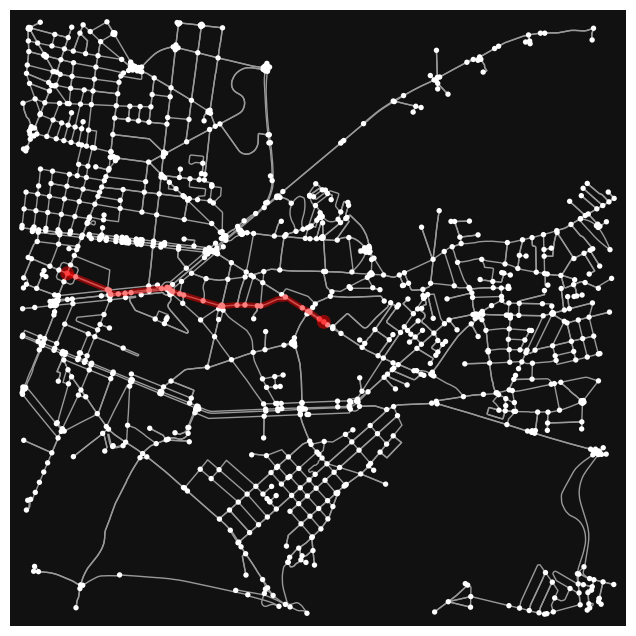

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [48]:
chemin=dijkstra_chemin(M,dic_nodes[1490539267],dic_nodes[199113295])

ox.plot_graph_route(G, chemin)

